# Lab 5: Integración numérica

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy
from scipy import integrate
import functools

## 2) 

Programar una función en python que integre numericamente usando las reglas compuestas del trapecio, punto medio y Simpson, nombrarla `intenumcomp`.

Deberá tomar como parámetros: `fun`, `a`, `b`, `N`, `regla`. Donde fun es la función a evaluar, (a,b) el intervalo, N la cantidad de iteraciones y regla un string indicando el método, que puede ser uno de: `trapecio`, `pm` o `simpson`.

### a) Regla compuesta del Trapecio

Esta regla esta dada por:

$$ \int_a^b {f(x) dx} \approx { (b - a)\over{2} } [ f(a) + f(b) ] $$

Al hacerla compuesta, lo que hacemos determinar N subintervalos (contenidos en el intervalo dado) y aplicar la regla sobre este intervalo, finalmente se suman todos los resultados y se obtiene la una mejor aproximación sobre el intervalo original dado.

In [109]:
def trapecio(f, a, b):
    """ Regla del Trapecio """
    s = ((b - a) / 2.0) * (f(a) + f(b))
    return s

def trapecio_compuesta(f, a, b, N):
    """ Regla del Trapecio Compuesta """
    
    # subintervalos
    X = np.linspace(a, b, N + 1)
    sub_intervals = zip(X[:-1], X[1:])
    
    # aplicar regla en todos los subintervalos
    s = 0.0
    for a, b in sub_intervals:
        s += trapecio(f, a, b)
    
    return s

### b) Regla de Simpson

Dada por:

$$ \int_a^b f(x) dx \approx {{(a - b) / 2}\over{3}} [ f(a) + 4 f({a + b\over 2}) + f(b) ] $$

Sin embargo, cuando se utiliza la regla de Simpson compuesta, se debe utilizar un algoritmo distinto al utilizado en el ejercicio anterior:

In [110]:
def simpson(f, a, b):
    """ Regla de Simpson """
    h = (b - a) / 2.0
    c = (a + b) / 2.0
    return (f(a) + f(b) + 4 * f(c)) * h / 3.0

def simpson_compuesta(f, a, b, N):
    """ Regla de Simpson Compuesta """

    assert N%2 == 0, 'se requiere que N sea par'
    
    # definir valores iniciales
    h = (b - a) / N
    sx0 = f(a) + f(b)
    sx1, sx2 = 0, 0
    x = a
    
    # recorrer subintervalos
    for j in range(1, N):
        x += h
        
        if j%2 == 0:
            sx2 += f(x)
        else:
            sx1 += f(x)
        
    # calcular resultado final
    sx = (sx0 + 2 * sx2 + 4 * sx1) * (h / 3)
    return sx

### c) Regla del punto medio

Dada por:

$$ \int_a^b f(x) dx \approx f ({a + b \over 2}) (b - a) $$

In [111]:
def pm(f, a, b):
    """ Regla del Punto Medio """
    c = (a + b) / 2.0
    return f(c) * (b - a)

def pm_compuesta(f, a, b, N):
    """ Regla del Punto Medio Compuesta """
    # subintervalos
    X = np.linspace(a, b, N + 1)
    sub_intervals = zip(X[:-1], X[1:])
    
    # aplicar regla en todos los subintervalos
    s = 0.0
    for a, b in sub_intervals:
        s += pm(f, a, b)
    
    return s

### c)

Realizamos la función que toma el parámetro nombre del método:

In [112]:
def intenumcomp(fun, a, b, N, regla):
    """ 
    aproximar integral de fun en un intervalo a, b dada el nombre de la regla
    usando la suma de las aproximaciones de cada subintervalo.
    """
    
    reglas = {
        'trapecio': trapecio_compuesta,
        'simpson': simpson_compuesta,
        'pm': pm_compuesta
    }
    
    assert regla in reglas.keys(), 'No existe la regla'

    s = reglas[regla](fun, a, b, N)

    return s

Probamos la función

In [113]:
for r in ['trapecio', 'simpson', 'pm']:
    s = intenumcomp(lambda x: 1/x, 1, 2, 10, r)
    print(f'Resultado para {r} : {s}')

Resultado para trapecio : 0.693771403175428
Resultado para simpson : 0.6931502306889302
Resultado para pm : 0.6928353604099601


## 2)

Mostrar los errores absolutos de integrar: 

$$ \int_0^1 e^{-x} dx $$

Usando 4, 10 y 20 subintervalos para cada una de las 3 reglas compuestas el ejercicio anterior.

Primero, comenzemos por entender cuáles son las funciones de error para cada uno de los métodos mencionados:

#### Trapecio

$$ - { (b - a) \over 12 } h^2 f''(\mu) $$

#### Simpson

$$ - { (b - a) \over 180 } h^4 f^{(4)} (\mu)  $$

#### Punto medio

$$ {(b - a) \over 6} h^2 f''(\mu) $$

Para poder escribir estos errores, comenzaremos por dar las derivadas 2das y 4tas de la función a aproximar. Estos son:

$ f''(x) = e^{-x} $ y $ f^{(4)} = e^{-x} $

Vemos que para el intervalo dado, nuestras derivadas siempre van a cumplir:

$ f''(x) \leq 1 $ y $ f^{(4)} \leq 1  $

Luego obviamos la parte de las funciones de error que utilizan el $ \mu $ calculando las derivadas y utilizamos únicamente el resto la función.

Por otro lado, vemos que para cada caso siempre vamos a tener el mismo $ h = { (b - a) \over n }$ Luego simplemente escribimos un algoritmo para considerar todos los casos:

In [126]:

for n in [4.0, 10.0, 20.0]: 
    # h = (b - a) / n
    h = 1.0 / n
    
    # error de la regla del trapecio
    err_trap = - (1 / 12) * pow(h, 2)
    
    # error de la regla de simpson
    err_simp = - (1 / 180) * pow(h, 4)
    
    # error de la regla del punto medio
    err_pm = (1 / 6) * pow(h, 2)
    
    print(f'''
Usando N = {n}: 
    Error Regla del Trapecio: {err_trap}
    Error Regla de Simpson: {err_simp}
    Error Regla de Punto Medio: {err_pm}
    ''')


Usando N = 4.0: 
    Error Regla del Trapecio: -0.005208333333333333
    Error Regla de Simpson: -2.170138888888889e-05
    Error Regla de Punto Medio: 0.010416666666666666
    

Usando N = 10.0: 
    Error Regla del Trapecio: -0.0008333333333333335
    Error Regla de Simpson: -5.555555555555557e-07
    Error Regla de Punto Medio: 0.001666666666666667
    

Usando N = 20.0: 
    Error Regla del Trapecio: -0.00020833333333333337
    Error Regla de Simpson: -3.472222222222223e-08
    Error Regla de Punto Medio: 0.00041666666666666675
    


## 3)

Escribir la función senint, que encuentre, usando la regla del trapecio la aproximación numérica de:

$$ \int_0^{x_i} cos(t) dt $$

la cantidad $ N_i $ de subintervalos debe ser escogida de forma que la longitud de los subintervalos sea menor o igual a 0.1.

Finalmente, graficar con pasos de 0.5 para $ x = 0,\dots,2\pi $ la función sin y senint simultáneamente.

In [127]:
def senint(x):
    # definir la función sobre
    # la regla
    fun = math.cos
    
    # definir la cantidad de subintervalos a usar
    N = math.ceil(x / 0.1)
    
    # definir los subintervalos
    X = np.linspace(0, x, N + 1)
    sub_intervals = zip(X[:-1], X[1:])
    
    # aproximar cada subintervalo
    # y reducir usando suma
    s = 0
    for (a, b) in sub_intervals:
        s += trapecio(fun, a, b)

    return s

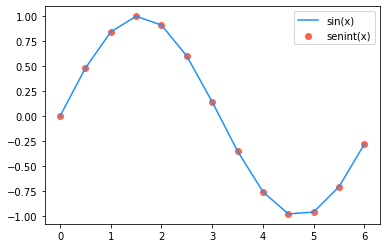

In [128]:
# plotear ambos

X = np.arange(0, 2*np.pi, 0.5)

Y_sin = np.sin(X)
Y_senint = [senint(x) for x in X]

plt.plot(X, Y_sin, color='dodgerblue', label='sin(x)')
plt.scatter(X, Y_senint, color='tomato', label='senint(x)')
plt.legend()

## 4)

Usar la reglas compuestas del Trapecio y la de Simpson para calcular las siguientes integrales, con una tolerancia de error de $ 10^{-5} $:

##### a) $ \int_0^1 x e^{-x} dx $

##### b) $ \int_0^1 x \sin(x) dx $

##### c) $ \int_0^1 (1 + x^2)^{3/2} dx $

##### d) $ \int_0^{\pi / 2} { 1 \over { \sqrt { 1 - \sin^2(t) / 2 } } } dt $

Al usar las reglas del Trapecio y la de Simpson para calcular las integrales, tenemos un determinado error, dado por la cantidad de subintervalos que utilizamos. Estas fórmulas de error son las descriptas en el ejercicio anterior.

In [1]:
# TODO

## 5)

Calcular las siguientes integrales utilizando la regla del Trapecio y Simpson, haciendo uso de la librería `scipy` (ver módule integrate).

##### a) $ I = \int_{-\infty}^{\infty} { e^{-x^2} dx } $

##### b) $ I = \int_0^2  { x^2 \log \left\langle x + \sqrt { x^2 + 1 } \right\rangle dx } $

In [32]:
# a)

# function and interval

f = lambda x: np.exp(-pow(x, 2))
a, b = -np.inf, np.inf

# build representative space

x = np.linspace(-100, 100, 500)
y = f(x)

# compare methods with quad

Is = integrate.simps(y, x)
It = integrate.trapz(y, x)
Iq = integrate.quad(f, a, b)[0]

print(
f'Regla de Simpson: {Is} \n'
f'Regla del trapecio: {It} \n'
f'Quad: {Iq}'
)

(1.7724538509055159, 1.7724538509055157, 1.7724538509055159)

In [44]:
# b)

# function and interval

f = lambda x: pow(x, 2) * np.log(x + np.sqrt(pow(x, 2) + 1))
a, b = 0, 2

# build representative space

x = np.linspace(0, 2, 500)
y = f(x)

# compare methods with quad

Is = integrate.simps(y, x)
It = integrate.trapz(y, x)
Iq = integrate.quad(f, a, b)[0]

print(
f'Regla de Simpson: {Is} \n'
f'Regla del trapecio: {It} \n'
f'Quad: {Iq}'
)

Regla de Simpson: 3.1305683986984096 
Regla del trapecio: 3.1305785082442594 
Quad: 3.1305683832546523
